# 2D数据类别划分

**任务:**

1、采用Kmeans算法实现2D数据自动聚类，预测V1=80,V2=60数据类别；

2、计算预测准确率，完成结果矫正

3、采用KNN、Meanshift算法，重复步骤1-2

数据：data.csv

In [2]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [3]:
# define the X and y
X = data.drop(['labels'], axis=1)
y = data.loc[:, 'labels']
y.head()
X.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


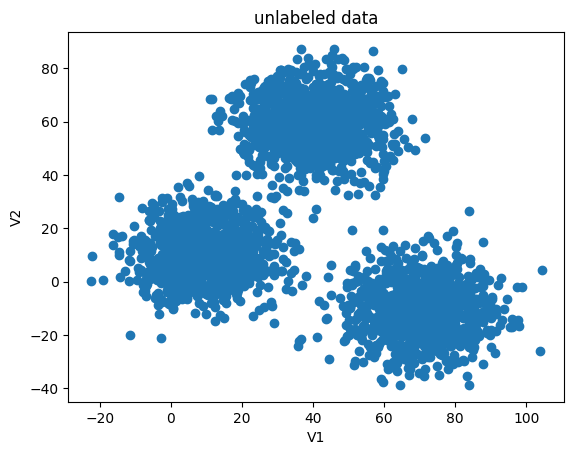

In [4]:
# visual the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:, 'V1'], X.loc[:, 'V2'])
plt.title("unlabeled data")
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()


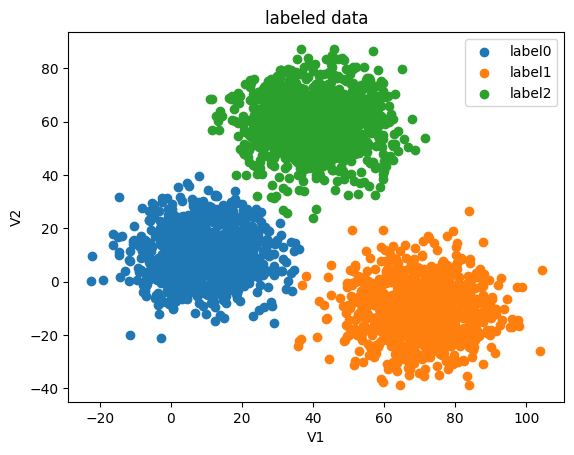

In [5]:
fig1 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])
plt.title("labeled data")
plt.xlabel("V1")
plt.ylabel("V2")

plt.legend((label0, label1, label2), ("label0", "label1", "label2"))

plt.show()

In [6]:
print(X.shape, y.shape)

(3000, 2) (3000,)


In [7]:
# establish the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

c:\Users\yin789\.virtualenvs\ai_course-AGtSknBU\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [8]:
centers = KM.cluster_centers_
print(centers)

[[ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]
 [  9.4780459   10.686052  ]]


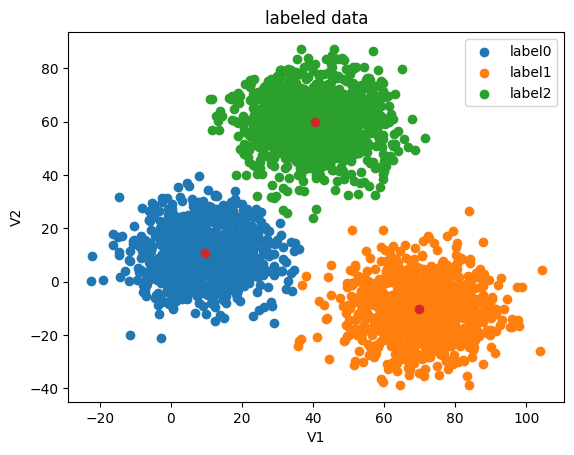

In [9]:
fig1 = plt.figure()
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])

plt.title("labeled data")
plt.xlabel("V1")
plt.ylabel("V2")

plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
# plot the center
# :,0 : 去获取第一维所有的行， 0 获取第一列
plt.scatter(centers[:,0], centers[:,1])

plt.show()

In [10]:
#test data: V1=80,V2=60
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)

[0]


c:\Users\yin789\.virtualenvs\ai_course-AGtSknBU\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [11]:
#predict based on training data
y_predict = KM.predict(X)
print(pd.value_counts(y_predict),pd.value_counts(y))

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\yin789\AppData\Local\Temp\ipykernel_18760\332104607.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict),pd.value_counts(y))


In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.31966666666666665


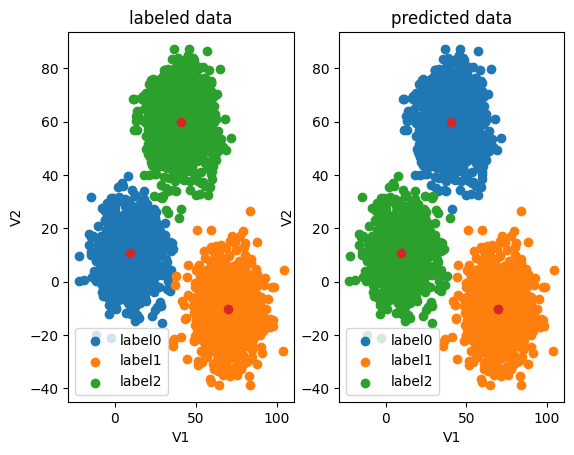

In [13]:
# visualize the predict results
fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])

plt.title("labeled data")
plt.xlabel("V1")
plt.ylabel("V2")

plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
# plot the center
# :,0 : 去获取第一维所有的行， 0 获取第一列
plt.scatter(centers[:,0], centers[:,1])


fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y_predict==0], X.loc[:, 'V2'][y_predict==0])
label1 = plt.scatter(X.loc[:, 'V1'][y_predict==1], X.loc[:, 'V2'][y_predict==1])
label2 = plt.scatter(X.loc[:, 'V1'][y_predict==2], X.loc[:, 'V2'][y_predict==2])

plt.title("predicted data")
plt.xlabel("V1")
plt.ylabel("V2")

plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
# plot the center
# :,0 : 去获取第一维所有的行， 0 获取第一列
plt.scatter(centers[:,0], centers[:,1])

plt.show()

In [14]:
# correct the results 
y_corrected = []
for y_p in y_predict:
    if y_p == 0:
        y_corrected.append(2)
    elif y_p == 2:
        y_corrected.append(0)
    else:
        y_corrected.append(1)

y_corrected = np.array(y_corrected)
print(y_corrected.shape)

(3000,)


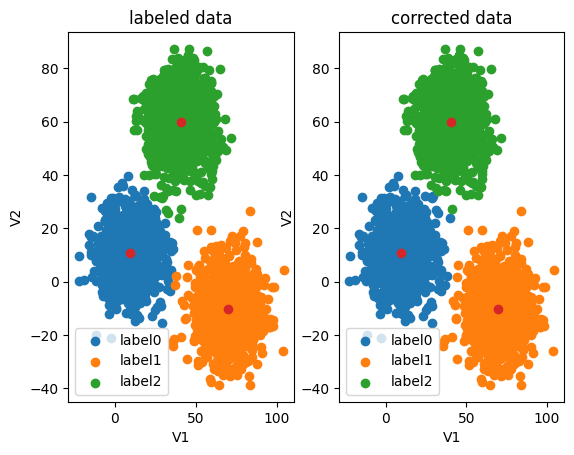

In [15]:
# visualize the predict results
fig7 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])

plt.title("labeled data")
plt.xlabel("V1")
plt.ylabel("V2")

plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
# plot the center
# :,0 : 去获取第一维所有的行， 0 获取第一列
plt.scatter(centers[:,0], centers[:,1])


fig8 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y_corrected==0], X.loc[:, 'V2'][y_corrected==0])
label1 = plt.scatter(X.loc[:, 'V1'][y_corrected==1], X.loc[:, 'V2'][y_corrected==1])
label2 = plt.scatter(X.loc[:, 'V1'][y_corrected==2], X.loc[:, 'V2'][y_corrected==2])

plt.title("corrected data")
plt.xlabel("V1")
plt.ylabel("V2")

plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
# plot the center
# :,0 : 去获取第一维所有的行， 0 获取第一列
plt.scatter(centers[:,0], centers[:,1])

plt.show()

In [16]:
# find the score

accuracy = accuracy_score(y,y_corrected)
print(f'accuracy is {accuracy}')

accuracy is 0.997


In [18]:
# establish the KNN model
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# evaluate the model
from sklearn.metrics import accuracy_score

y_predict_knn = KNN.predict(X)

accuracy = accuracy_score(y, y_predict_knn)
print(f'accuracy of knn is {accuracy}')

print(pd.value_counts(y_predict_knn), pd.value_counts(y))

accuracy of knn is 1.0
2    1156
1     954
0     890
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\yin789\AppData\Local\Temp\ipykernel_18760\4232230860.py:9: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict_knn), pd.value_counts(y))


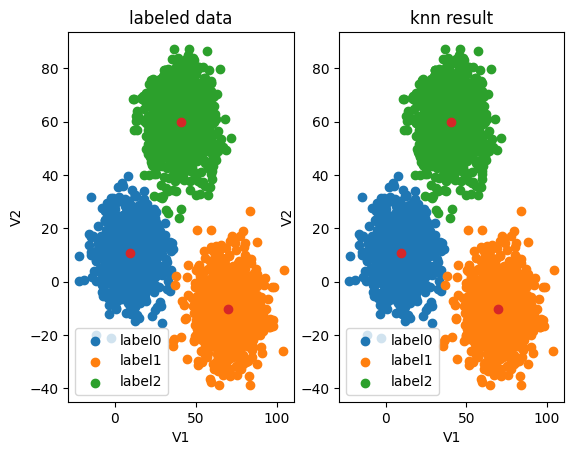

In [21]:
fig9 = plt.subplot(121)
label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])

plt.title("labeled data")
plt.xlabel("V1")
plt.ylabel("V2")

plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
# plot the center
# :,0 : 去获取第一维所有的行， 0 获取第一列
plt.scatter(centers[:,0], centers[:,1])


fig10 = plt.subplot(122)
label0 = plt.scatter(X.loc[:, 'V1'][y_predict_knn==0], X.loc[:, 'V2'][y_predict_knn==0])
label1 = plt.scatter(X.loc[:, 'V1'][y_predict_knn==1], X.loc[:, 'V2'][y_predict_knn==1])
label2 = plt.scatter(X.loc[:, 'V1'][y_predict_knn==2], X.loc[:, 'V2'][y_predict_knn==2])

plt.title("knn result")
plt.xlabel("V1")
plt.ylabel("V2")

plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
# plot the center
# :,0 : 去获取第一维所有的行， 0 获取第一列
plt.scatter(centers[:,0], centers[:,1])

plt.show()

### Meanshift

In [27]:
# calculate the bandwidth
from sklearn.cluster import MeanShift, estimate_bandwidth

#obtain the bandwidth
bw = estimate_bandwidth(X, n_samples=500)
print(bw)

30.84663454820215


In [28]:
# establish the modal
ms = MeanShift(bandwidth=bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

In [29]:
y_predict_ms = ms.predict(X)

In [30]:
print(pd.value_counts(y_predict_ms), pd.value_counts(y))

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


C:\Users\yin789\AppData\Local\Temp\ipykernel_18760\1444259243.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_predict_ms), pd.value_counts(y))


In [33]:
def draw_result(y_predict, predict_label):
    fig9 = plt.subplot(121)
    label0 = plt.scatter(X.loc[:, 'V1'][y==0], X.loc[:, 'V2'][y==0])
    label1 = plt.scatter(X.loc[:, 'V1'][y==1], X.loc[:, 'V2'][y==1])
    label2 = plt.scatter(X.loc[:, 'V1'][y==2], X.loc[:, 'V2'][y==2])

    plt.title("labeled data")
    plt.xlabel("V1")
    plt.ylabel("V2")

    plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
    # plot the center
    # :,0 : 去获取第一维所有的行， 0 获取第一列
    plt.scatter(centers[:,0], centers[:,1])


    fig10 = plt.subplot(122)
    label0 = plt.scatter(X.loc[:, 'V1'][y_predict==0], X.loc[:, 'V2'][y_predict==0])
    label1 = plt.scatter(X.loc[:, 'V1'][y_predict==1], X.loc[:, 'V2'][y_predict==1])
    label2 = plt.scatter(X.loc[:, 'V1'][y_predict==2], X.loc[:, 'V2'][y_predict==2])

    plt.title(predict_label)
    plt.xlabel("V1")
    plt.ylabel("V2")

    plt.legend((label0, label1, label2), ("label0", "label1", "label2"))
    # plot the center
    # :,0 : 去获取第一维所有的行， 0 获取第一列
    plt.scatter(centers[:,0], centers[:,1])

    plt.show()

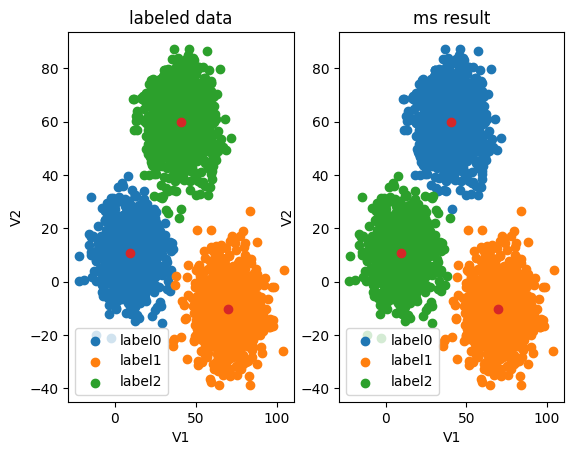

In [34]:
draw_result(y_predict_ms, 'ms result')

In [38]:
# correct the results 
y_corrected_ms = []
for y_p in y_predict_ms:
    if y_p == 0:
        y_corrected_ms.append(2)
    elif y_p == 2:
        y_corrected_ms.append(0)
    else:
        y_corrected_ms.append(1)

y_corrected_ms = np.array(y_corrected_ms)
print(y_corrected_ms.shape)

(3000,)


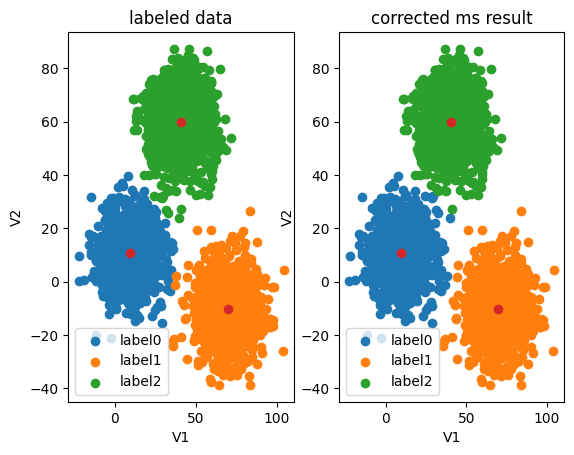

In [39]:
draw_result(y_corrected_ms, 'corrected ms result')

In [41]:
accuracy = accuracy_score(y_corrected_ms, y)
print(accuracy)

0.997
